# WeatherPy

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import os.path

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities list

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name 
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)                                   

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
#weather variables 
units = "imperial"
city_list = []
max_tempF = []
humid = []
cloud = []
wind = []
lat = []
lon = []
country = []
counter = 0

## perform API calls

In [4]:
base_url = "https://api.openweathermap.org/data/2.5/weather?q="

for city in cities:

    try:
        url = f"{base_url}{city}&appid={weather_api_key}&units={units}"
        response = requests.get(url).json()

        city_list.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_tempF.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])

        counter += 1

        print(f"""
        found city number {counter}: {city}
        """)
    except KeyError: 
        print(f"city {city} not found")


        found city number 1: ushuaia
        

        found city number 2: tuatapere
        

        found city number 3: norman wells
        

        found city number 4: vaini
        

        found city number 5: grand gaube
        

        found city number 6: cherskiy
        

        found city number 7: hermanus
        

        found city number 8: tarko-sale
        

        found city number 9: kruisfontein
        

        found city number 10: aurillac
        

        found city number 11: port alfred
        

        found city number 12: hobart
        

        found city number 13: vila franca do campo
        

        found city number 14: aksarka
        

        found city number 15: tanete
        

        found city number 16: khatanga
        
city attawapiskat not found
city belushya guba not found
city juifang not found

        found city number 17: alofi
        

        found city number 18: cabo san lucas
        

        found city numb


        found city number 158: aksaray
        

        found city number 159: stephenville
        

        found city number 160: walvis bay
        

        found city number 161: sidi ali
        

        found city number 162: mar del plata
        

        found city number 163: batagay-alyta
        

        found city number 164: alcantarilla
        

        found city number 165: bengkulu
        

        found city number 166: nyuksenitsa
        

        found city number 167: salalah
        

        found city number 168: khandyga
        

        found city number 169: celestun
        

        found city number 170: matamoros
        

        found city number 171: barrow
        

        found city number 172: whitehorse
        

        found city number 173: solnechnyy
        

        found city number 174: thinadhoo
        

        found city number 175: jequie
        

        found city number 176: acireale
        
city hvammstangi not found



        found city number 314: xining
        

        found city number 315: westerly
        

        found city number 316: srednekolymsk
        

        found city number 317: salvador
        
city satitoa not found

        found city number 318: kikwit
        

        found city number 319: barrhead
        

        found city number 320: concepcion
        

        found city number 321: okhotsk
        

        found city number 322: belmonte
        

        found city number 323: tessalit
        

        found city number 324: iraquara
        

        found city number 325: horsham
        

        found city number 326: omboue
        

        found city number 327: newtownards
        

        found city number 328: alyangula
        

        found city number 329: haines junction
        

        found city number 330: araouane
        

        found city number 331: cruzeiro do sul
        

        found city number 332: fortuna
        

        fo


        found city number 471: yulara
        

        found city number 472: umm lajj
        

        found city number 473: sabya
        

        found city number 474: mao
        

        found city number 475: alihe
        
city rawannawi not found

        found city number 476: bagdarin
        

        found city number 477: denpasar
        

        found city number 478: yinchuan
        

        found city number 479: akyab
        

        found city number 480: barranca
        

        found city number 481: whitianga
        

        found city number 482: nombre de dios
        

        found city number 483: kolondieba
        

        found city number 484: zhezkazgan
        

        found city number 485: zhuhai
        

        found city number 486: bundaberg
        

        found city number 487: fernley
        

        found city number 488: les cayes
        

        found city number 489: general roca
        

        found city number 

## Convert Raw Data to DataFrame
* create csv file

In [5]:
#create dictionary from lists
cities_dict = {'City':city_list, 'Lat':lat, "Lon":lon, 'Temp(f)':max_tempF, 'Humidity':humid, 'Cloudiness':cloud, 'Wind Speed':wind, 'Country':country}
#create panda df from dictionary
city_df = pd.DataFrame(cities_dict)

In [6]:
#pass df to csv file
city_df.to_csv("cities.csv",index=False)

In [2]:
#read csv file
cities_df = pd.read_csv("cities.csv")
cities_df

,City,Lat,Lon,Temp(f),Humidity,Cloudiness,Wind Speed,Country
0,Ushuaia,-54.80,-68.30,44.60,81,40,9.17,AR
1,Tuatapere,-46.13,167.68,45.03,82,0,4.29,NZ
2,Norman Wells,65.28,-126.83,30.20,54,90,17.22,CA
3,Vaini,-21.20,-175.20,75.20,88,75,5.70,TO
4,Grand Gaube,-20.01,57.66,72.00,82,0,1.01,MU
...,...,...,...,...,...,...,...,...
554,Luganville,-15.53,167.17,78.80,78,90,3.36,VU
555,São Miguel do Iguaçu,-25.35,-54.24,64.40,68,0,3.36,BR
556,San Quintín,30.48,-115.95,66.94,69,79,9.10,MX
557,Awasa,7.05,38.47,60.42,83,29,3.11,ET


## Inspect the data and remove the cities where the humidity > 100%.
skip if there are no cities that have humidity > 100%. 

In [3]:
#  Get the indices of cities that have humidity over 100%.
cities_df.loc[cities_df["Humidity"]==100]

,City,Lat,Lon,Temp(f),Humidity,Cloudiness,Wind Speed,Country
71,Isangel,-19.55,169.27,66.20,100,20,11.36,VU
110,Elk Plain,47.05,-122.40,59.00,100,75,6.93,US
156,George Town,5.41,100.34,78.80,100,40,3.36,MY
178,Da Lat,11.95,108.44,61.79,100,36,0.76,VN
246,Christchurch,-43.53,172.63,46.99,100,0,2.24,NZ
268,Airai,-8.93,125.41,61.20,100,47,3.96,TL
434,Honiara,-9.43,159.95,77.00,100,75,4.81,SB
500,Seoul,37.57,126.98,62.60,100,75,6.93,KR


In [4]:
#get info for city with outlier wind speed
cities_df.loc[cities_df["Wind Speed"]>200]

,City,Lat,Lon,Temp(f),Humidity,Cloudiness,Wind Speed,Country
109,Meridian,43.61,-116.39,70.0,29,1,818.05,US


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_df = cities_df.loc[cities_df["Humidity"]!=100]
clean_df = clean_df.loc[clean_df["Wind Speed"]<200]
clean_df

,City,Lat,Lon,Temp(f),Humidity,Cloudiness,Wind Speed,Country
0,Ushuaia,-54.80,-68.30,44.60,81,40,9.17,AR
1,Tuatapere,-46.13,167.68,45.03,82,0,4.29,NZ
2,Norman Wells,65.28,-126.83,30.20,54,90,17.22,CA
3,Vaini,-21.20,-175.20,75.20,88,75,5.70,TO
4,Grand Gaube,-20.01,57.66,72.00,82,0,1.01,MU
...,...,...,...,...,...,...,...,...
554,Luganville,-15.53,167.17,78.80,78,90,3.36,VU
555,São Miguel do Iguaçu,-25.35,-54.24,64.40,68,0,3.36,BR
556,San Quintín,30.48,-115.95,66.94,69,79,9.10,MX
557,Awasa,7.05,38.47,60.42,83,29,3.11,ET


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs Tempurature Plot 

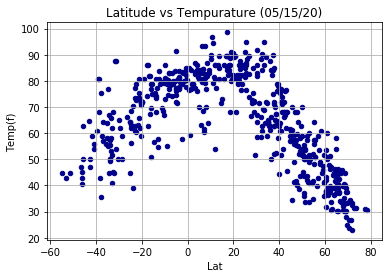

In [24]:
ax1 = clean_df.plot.scatter(x='Lat',
                      y='Temp(f)',
                      c='DarkBlue')
plt.title('Latitude vs Tempurature (05/15/20)')
ax1.grid()

#save image
plt.savefig(os.path.join("images","lat_temp"))

## Latitude vs. Humidity Plot

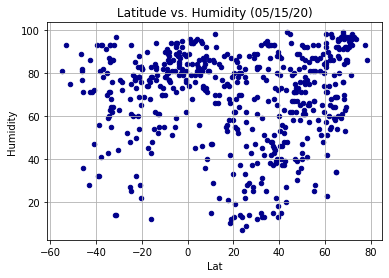

In [37]:
ax2 = clean_df.plot.scatter(x='Lat',
                      y='Humidity',
                      c='DarkBlue')
plt.title('Latitude vs. Humidity (05/15/20)')
ax2.grid()
#save image
plt.savefig(os.path.join("images","lat_himidity"))

## Latitude vs. Cloudiness Plot

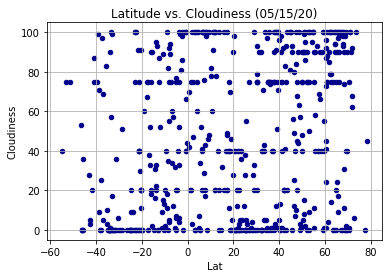

In [25]:
ax3 = clean_df.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='DarkBlue')
plt.title('Latitude vs. Cloudiness (05/15/20)')
ax3.grid()

#save image
plt.savefig(os.path.join("images","lat_cloudiness"))

## Latitude vs. Wind Speed Plot

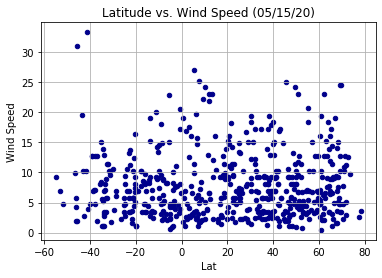

In [26]:
ax4 = clean_df.plot.scatter(x='Lat',
                           y='Wind Speed',
                           c= 'DarkBlue')
plt.title('Latitude vs. Wind Speed (05/15/20)')
ax4.grid()

#save image
plt.savefig(os.path.join("images","lat_wind"))

# Linear Regression

In [28]:
# OPTIONAL: Create a function to create Linear Regression plots
#create N. & S. hemisphere data Df
Ncities_df = clean_df.loc[clean_df['Lat']>0]
Scities_df = clean_df.loc[clean_df['Lat']<0]

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.7324749737455977


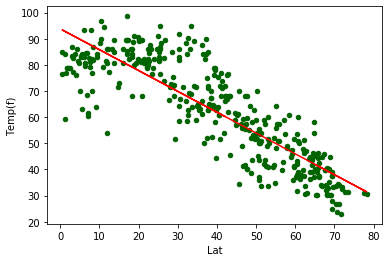

In [29]:
#create x,y varaibles
x_val = Ncities_df['Lat']
y_val = Ncities_df['Temp(f)']

#create linear regression values
slope, intercept, r_value, p_value, std_err = linregress(x_val, y_val)
line_eq= f"y = {str(round(slope,2))}x + {str(intercept)}"

#print R-squared
print(f"R-squared: {r_value**2}")

#plot scatter
ax5 = Ncities_df.plot.scatter(x= 'Lat',
                             y= 'Temp(f)',
                             c= 'DarkGreen')

#plot linear regressions line
plt.plot(x_val, intercept + slope*x_val, 'r', label='fitted line')

#print line equation
#line_eq= f"y = {str(round(slope,2))}x + {str(intercept)}"
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig(os.path.join("images","N_hem_temp"))

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.5191506209013272


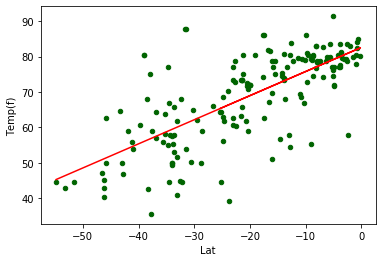

In [30]:
#create x,y varaibles
x_val = Scities_df['Lat']
y_val = Scities_df['Temp(f)']

#create linear regression values
slope, intercept, r_value, p_value, std_err = linregress(x_val, y_val)

#print R-squared
print(f"R-squared: {r_value**2}")

#plot scatter
ax6 = Scities_df.plot.scatter(x= 'Lat',
                             y= 'Temp(f)',
                             c= 'DarkGreen')

#plot linear regressions line
plt.plot(x_val, intercept + slope*x_val, 'r', label='fitted line')
plt.savefig(os.path.join("images","S_hem_temp"))

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.021092557116726852


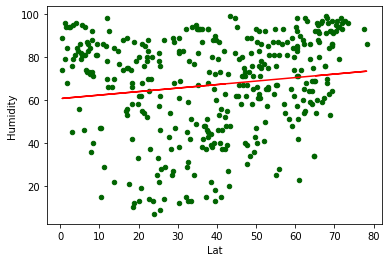

In [31]:
#create x,y varaibles
x_val = Ncities_df['Lat']
y_val = Ncities_df['Humidity']

#create linear regression values
slope, intercept, r_value, p_value, std_err = linregress(x_val, y_val)

#print R-squared
print(f"R-squared: {r_value**2}")

#plot scatter
ax7 = Ncities_df.plot.scatter(x= 'Lat',
                             y= 'Humidity',
                             c= 'DarkGreen')

#plot linear regressions line
plt.plot(x_val, intercept + slope*x_val, 'r', label='fitted line')
plt.savefig(os.path.join("images","N_hem_Humidity"))

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.05012613925296701


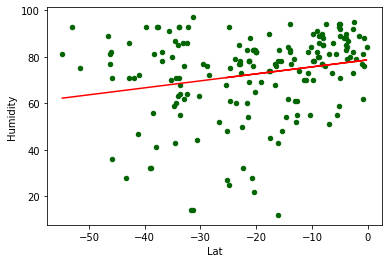

In [32]:
#create x,y varaibles
x_val = Scities_df['Lat']
y_val = Scities_df['Humidity']

#create linear regression values
slope, intercept, r_value, p_value, std_err = linregress(x_val, y_val)

#print R-squared
print(f"R-squared: {r_value**2}")

#plot scatter
ax8 = Scities_df.plot.scatter(x= 'Lat',
                             y= 'Humidity',
                             c= 'DarkGreen')

#plot linear regressions line
plt.plot(x_val, intercept + slope*x_val, 'r', label='fitted line')
plt.savefig(os.path.join("images","S_hem_Humidity"))

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.026661627269501175


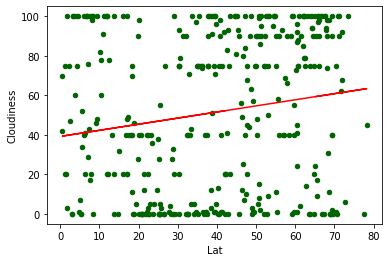

In [33]:
#create x,y varaibles
x_val = Ncities_df['Lat']
y_val = Ncities_df['Cloudiness']

#create linear regression values
slope, intercept, r_value, p_value, std_err = linregress(x_val, y_val)

#print R-squared
print(f"R-squared: {r_value**2}")

#plot scatter
ax8 =  Ncities_df.plot.scatter(x= 'Lat',
                             y= 'Cloudiness',
                             c= 'DarkGreen')

#plot linear regressions line
plt.plot(x_val, intercept + slope*x_val, 'r', label='fitted line')
plt.savefig(os.path.join("images","N_hem_cloudiness"))

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.047057250219451584


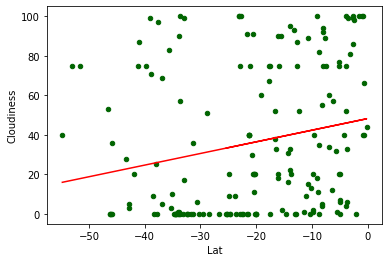

In [34]:
#create x,y varaibles
x_val = Scities_df['Lat']
y_val = Scities_df['Cloudiness']

#create linear regression values
slope, intercept, r_value, p_value, std_err = linregress(x_val, y_val)

#print R-squared
print(f"R-squared: {r_value**2}")

#plot scatter
ax8 = Scities_df.plot.scatter(x= 'Lat',
                             y= 'Cloudiness',
                             c= 'DarkGreen')

#plot linear regressions line
plt.plot(x_val, intercept + slope*x_val, 'r', label='fitted line')
plt.savefig(os.path.join("images","S_hem_cloudiness"))

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.00040588082956851735


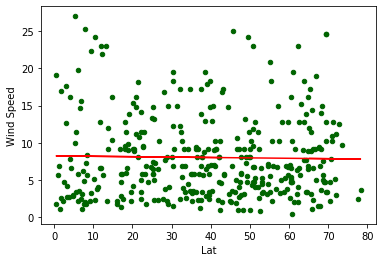

In [35]:
#create x,y varaibles
x_val = Ncities_df['Lat']
y_val = Ncities_df['Wind Speed']

#create linear regression values
slope, intercept, r_value, p_value, std_err = linregress(x_val, y_val)

#print R-squared
print(f"R-squared: {r_value**2}")

#plot scatter
ax8 =  Ncities_df.plot.scatter(x= 'Lat',
                             y= 'Wind Speed',
                             c= 'DarkGreen')

#plot linear regressions line
plt.plot(x_val, intercept + slope*x_val, 'r', label='fitted line')
plt.savefig(os.path.join("images","N_hem_wind"))

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.008241608109550842


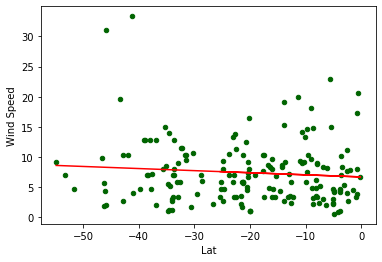

In [36]:
#create x,y varaibles
x_val = Scities_df['Lat']
y_val = Scities_df['Wind Speed']

#create linear regression values
slope, intercept, r_value, p_value, std_err = linregress(x_val, y_val)

#print R-squared
print(f"R-squared: {r_value**2}")

#plot scatter
ax8 = Scities_df.plot.scatter(x= 'Lat',
                             y= 'Wind Speed',
                             c= 'DarkGreen')
#plot linear regressions line
plt.plot(x_val, intercept + slope*x_val, 'r', label='fitted line')
plt.savefig(os.path.join("images","S_hem_wind"))

In [64]:
#pass clean df to csv file
clean_df.to_csv("clean_cities.csv",index=False)